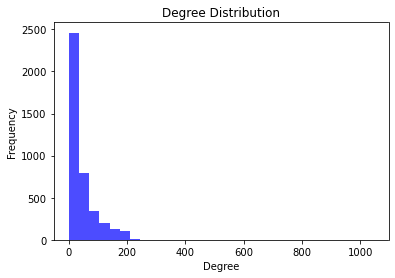

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read the dataset from the text file
# Assuming the dataset contains edges, one per line, with nodes separated by whitespace
def read_dataset(file_path):
    with open(file_path, 'r') as file:
        edges = [tuple(map(int, line.strip().split())) for line in file]
    return edges

# Step 2: Create a graph representation
def create_graph(data):
    G = nx.Graph()
    G.add_edges_from(data)
    return G

# Step 3: Calculate the degree of each node
def plot_degree_distribution(graph):
    degrees = [degree for node, degree in graph.degree()]
    plt.hist(degrees, bins=30, alpha=0.7, color='b')
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

# Step 4: Plot the degree distribution
if __name__ == "__main__":
    file_path = 'facebook_combined.txt'  # Update this with the path to your dataset
    data = read_dataset(file_path)
    graph = create_graph(data)
    plot_degree_distribution(graph)


In [12]:
# Define a function to calculate the clustering coefficient for a node
def clustering_coefficient(node, adjacency_list):
    neighbors = adjacency_list[node]
    k = len(neighbors)
    if k < 2:
        return 0.0  # Return 0 if the node has less than 2 neighbors

    triangles = 0
    for i in range(k):
        for j in range(i+1, k):
            if neighbors[i] in adjacency_list[neighbors[j]]:
                triangles += 1

    # Clustering coefficient formula: 2 * number of triangles / (k * (k - 1))
    return 2.0 * triangles / (k * (k - 1))

# Define a function to calculate the average clustering coefficient of the entire graph
def average_clustering_coefficient(adjacency_list):
    total_coefficient = 0.0
    n = len(adjacency_list)

    # Iterate through each node in the graph
    for i in range(n):
        total_coefficient += clustering_coefficient(i, adjacency_list)

    # Average clustering coefficient formula: sum of clustering coefficients / number of nodes
    return total_coefficient / n

def parse_graph_from_file(file_path):
    adjacency_list = {}
    with open(file_path, 'r') as file:
        for line in file:
            source, target = map(int, line.split())
            if source not in adjacency_list:
                adjacency_list[source] = []
            if target not in adjacency_list:
                adjacency_list[target] = []
            adjacency_list[source].append(target)
            adjacency_list[target].append(source)
    return adjacency_list

def main():
    # Read edges from the text file
    edges = []
    try:
        with open("facebook_combined.txt", 'r') as file:
            for line in file:
                source, target = map(int, line.split())
                edges.append((source, target))
    except FileNotFoundError:
        print("Failed to open the file.")
        return

    # Determine the maximum node ID
    max_node_id = max(max(edge) for edge in edges)

    # Create an adjacency list representation of the graph
    adjacency_list = {i: [] for i in range(max_node_id + 1)}
    for a, b in edges:
        adjacency_list[a].append(b)
        adjacency_list[b].append(a)

    # Calculate the average clustering coefficient
    avg_clustering_coefficient = average_clustering_coefficient(adjacency_list)

    # Print the average clustering coefficient
    print("Average clustering coefficient:", avg_clustering_coefficient)

    # Write the output to the file
    with open("ClusteringCoefficient-output.txt", 'w') as file:
        file.write(f"Average clustering coefficient: {avg_clustering_coefficient}")

if __name__ == "__main__":
    main()


Average clustering coefficient: 0.6055467186200871


In [13]:
from collections import defaultdict, deque
from typing import Dict
import os

# Function to represent a graph as an adjacency list
def build_graph(edges):
    graph = defaultdict(list)
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)  # For undirected graph
    return graph

# Function to perform Breadth First Search
def bfs(graph, start):
    distances = {}
    visited = set()
    queue = deque([(start, 0)])  # (node, distance)
    visited.add(start)

    while queue:
        node, dist = queue.popleft()
        distances[node] = dist

        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append((neighbor, dist + 1))
                visited.add(neighbor)

    return distances

# Function to calculate average path length of the graph
def average_path_length(graph):
    total_length = 0
    num_nodes = len(graph)

    for node in graph:
        distances = bfs(graph, node)
        total_length += sum(distances.values())

    # Divide total path length by number of node pairs to get average path length
    return total_length / (num_nodes * (num_nodes - 1))

def main():
    # Read edges from the text file
    edges = []
    file_path = "facebook_combined.txt"
    with open(file_path, 'r') as file:
        for line in file:
            source, target = map(int, line.split())
            edges.append((source, target))

    # Build the graph
    graph = build_graph(edges)

    # Calculate the average path length
    avg_length = average_path_length(graph)

    # Write the average path length to a file
    output_path = "AveragePathLen-output.txt"
    with open(output_path, 'w') as file:
        file.write(f"Average Path Length: {avg_length:.2f}\n")

    print(f"Average Path Length: {avg_length:.2f}")

if __name__ == "__main__":
    main()


Average Path Length: 3.69


In [26]:
#betweenness

import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset and create a graph
# Assuming your dataset is an edgelist in a text file where each line represents an edge (e.g., "node1 node2")
with open('facebook_combined.txt', 'r') as f:
    edges = [line.strip().split() for line in f]

# Create a graph from the edges
G = nx.Graph()
G.add_edges_from(edges)

# Calculate betweenness centrality measures
betweenness_centrality = nx.betweenness_centrality(G)

# Plot the betweenness centrality measures
plt.figure(figsize=(10, 6))
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality Measures')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

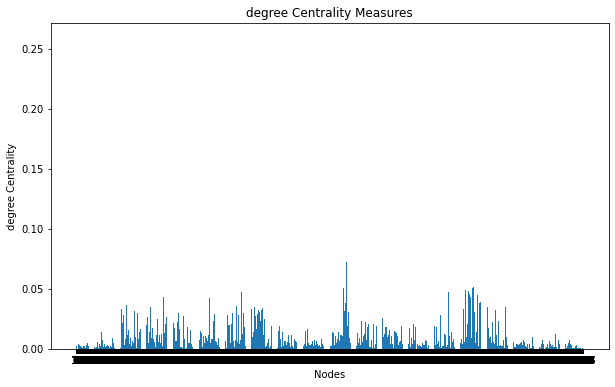

In [31]:
Dc=nx.degree_centrality(G)

plt.figure(figsize=(10, 6))
plt.bar(Dc.keys(), Dc.values())
plt.xlabel('Nodes')
plt.ylabel('degree Centrality')
plt.title('degree Centrality Measures')
plt.show()

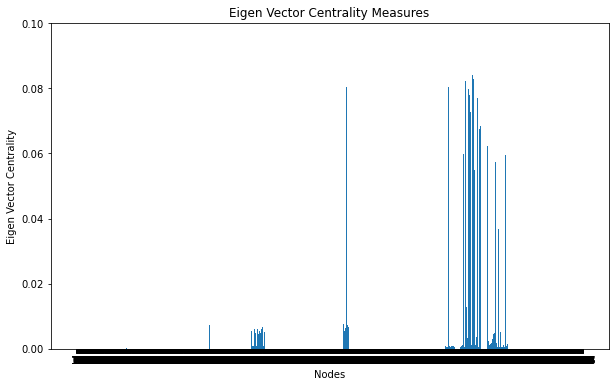

In [32]:
xy = nx.eigenvector_centrality(G)

plt.figure(figsize=(10, 6))
plt.bar(xy.keys(), xy.values())
plt.xlabel('Nodes')
plt.ylabel('Eigen Vector Centrality')
plt.title('Eigen Vector Centrality Measures')
plt.show()

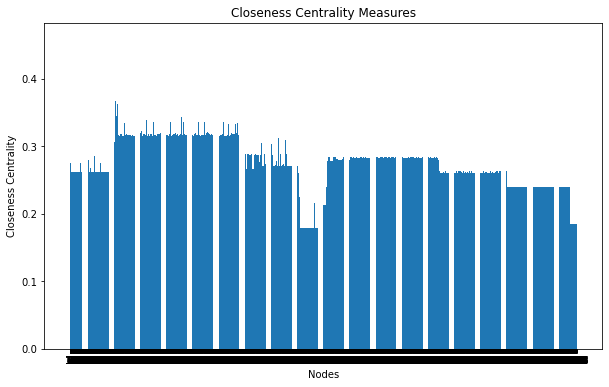

In [33]:
xy = nx.closeness_centrality(G)

plt.figure(figsize=(10, 6))
plt.bar(xy.keys(), xy.values())
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality Measures')
plt.show()